<a href="https://colab.research.google.com/github/cwcheng0/practicepython/blob/master/SKLearn_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SKLearn-Linear Regression
# 2019-1-22
# Source https://www.smwenku.com/a/5c2206e8bd9eee16b4a76907
# Source2 http://learningwithdata.com/python-for-data-mining.html
# A mix of may ways. No internet resource can smoothly run this result.
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from urllib.request import urlopen
import numpy as np
from sklearn import datasets, linear_model
from pandas import DataFrame, Series
from __future__ import division
import seaborn as sns

sns.set(style='ticks', palette='Set2')
%matplotlib inline

# Read data and set columns
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)
data = data.dropna()
data.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


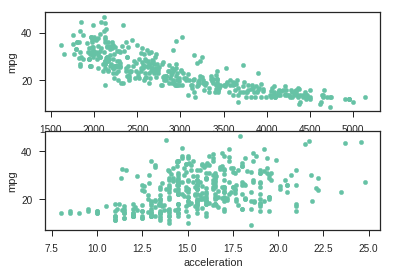

In [0]:
# Choose a model and predict
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
data.plot("weight", "mpg", kind='scatter', ax=ax1) #觀察重量對油耗影響
data.plot("acceleration", "mpg", kind='scatter', ax=ax2) #觀察加速度對油耗影響
plt.show()

In [0]:
# Use Linear Regression model
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(data[["weight"]], data["mpg"]) #.fit 訓練數據
predictions = lr.predict(data[["weight"]]) #.predict # 預測值

print(predictions[0:5])
print(data["mpg"][0:5])

[19.41852276 17.96764345 19.94053224 19.96356207 19.84073631]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


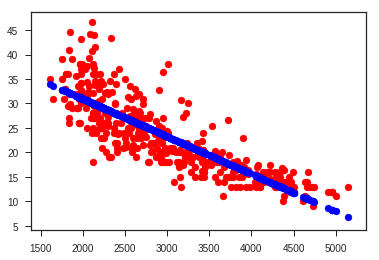

In [0]:
# Visualize it
plt.scatter(data["weight"], data["mpg"], c='red') #真實值。
plt.scatter(data["weight"], predictions, c='blue') #用算法得出的預測值，圖中藍線
plt.show()

In [0]:
# Count the error rate
lr = LinearRegression()
lr.fit(data[["weight"]], data["mpg"])
predictions = lr.predict(data[["weight"]])
from sklearn.metrics import mean_squared_error #均方誤差函數模塊
mse = mean_squared_error(data["mpg"], predictions) 
print("The rrror rate is:",mse, "%")

The rrror rate is: 18.780939734628394 %


In [0]:
# square root
mse = mean_squared_error(data["mpg"], predictions)
rmse = mse ** (0.5) #開根號後
print (rmse)

4.333698159150957


In [0]:
# Describe this data
data.groupby(['cylinders']).mpg.describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


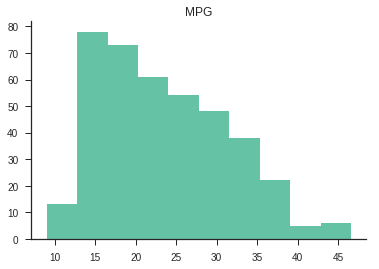

In [0]:
# By MPG
p = plt.hist(data.mpg)
plt.title("MPG")
p
sns.despine()

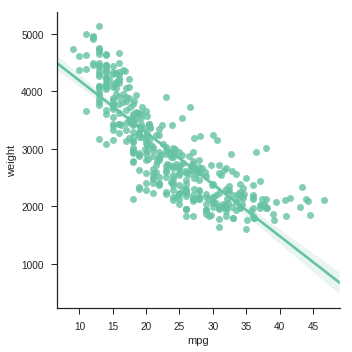

In [0]:
# By Mpg & Weight
sns.lmplot("mpg", "weight", data);

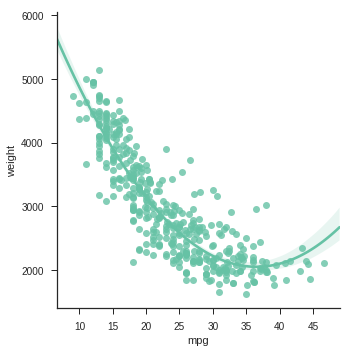

In [0]:
#
sns.lmplot("mpg", "weight", data, order=2);

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


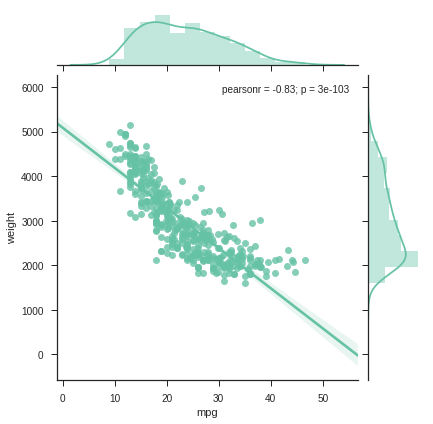

In [0]:
#
sns.jointplot("mpg", "weight", data, kind="reg")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


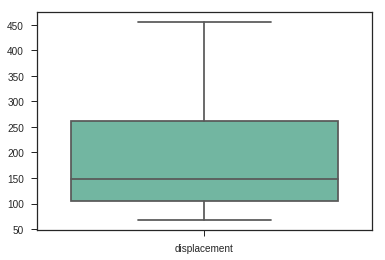

In [0]:
#
sns.boxplot(data[['displacement', 'horsepower']])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


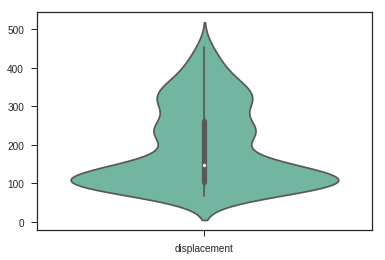

In [0]:
#
sns.violinplot(data[['displacement', 'horsepower']])

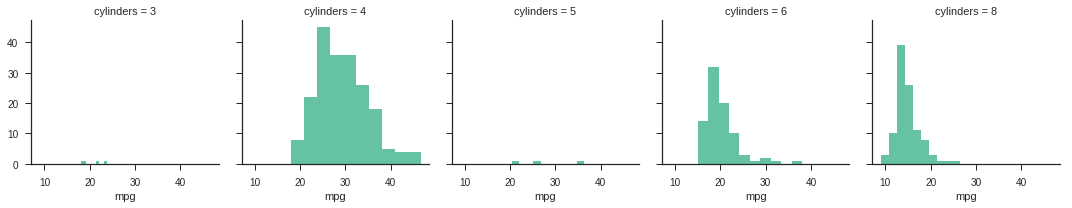

In [0]:
# By different cylinders
g = sns.FacetGrid(data, col="cylinders")
g.map(plt.hist, "mpg");

In [1]:
# Use Boston House Price
# 2019-1-28
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()

#可以看看有哪些feature欄位
features = boston.feature_names  
print(features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Check data
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
# 第七個欄位來當 feature
X =boston.data[:, np.newaxis, 7]   #the 7th feature is DIS 
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  #test_size預設是0.25

In [3]:
# Print
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_result = regression.predict(X_test)

#印出係數
print('coef', regression.coef_)
#印出均方誤差
print('MSE', mean_squared_error(y_test, y_result))

coef [0.95437533]
MSE 71.51596782695601


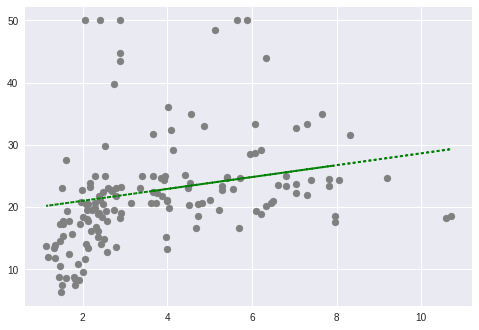

In [4]:
# Draw a picture
plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_result, color='green', linewidth=2, linestyle=':')

plt.show()